# Assignment 2: Voting Visualized

## Deadline

Oct. 24th

## Important notes

- Make sure you push on GitHub your notebook with all the cells already evaluated.
- Note that maps do not render in a standard Github environment. You should export them to HTML and **link them in your notebook**.
- Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented.
- Please write all your comments in English, and use meaningful variable names in your code.

## Background


* Are you curious to know what the political leanings of the people of Switzerland are?
* Do you wake up in a cold sweat, wondering which party won the last cantonal parliament election in Vaud?
* Are you looking to learn all sorts of visualizations, including maps, in Python?

If your answer to any of the above is yes, this assignment is just right for you. Otherwise, it's still an assignment, so we're terribly sorry.

The chief aim of this assignment is to familiarize you with visualizations in Python, particularly maps, and also to give you some insight into how visualizations are to be interpreted. The data we will use is the data on Swiss cantonal parliament elections from 2007 to 2018, which contains, for each cantonal election in this time period, the voting percentages for each party and canton.

For the visualization part, install [Folium](Folium) (_Hint: it is not available in your standard Anaconda environment, therefore search on the Web how to install it easily!_). Folium's README comes with very clear examples, and links to their own iPython Notebooks -- make good use of this information. For your own convenience, in this same directory you can already find one TopoJSON file, containing the geo-coordinates of the cantonal borders of Switzerland.

One last, general reminder: back up any hypotheses and claims with data, since this is an important aspect of the course.

In [1]:
# Imports Library
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import folium

import os
import warnings

%matplotlib inline
warnings.filterwarnings('ignore') # ingnore all the warnings

## Task 1: Cartography and census

__A)__ Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

__B)__ Take the spreadsheet `data/communes_pop.xls`, collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/catalogues-banques-donnees/tableaux.assetdetail.5886191.html), containing population figures for every commune. You can use [pd.read_excel()](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html) to read the file and to select specific sheets. Plot a histogram of the population counts and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

__C)__ The figure below represents 4 types of histogram. At this stage, our distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as show in Fig.(d), in which the y-axis represents the number of data points with values greater than x.  
  
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw_crop.png" style="width: 600px;">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

### Task1.A 
Display a Swiss map that has cantonal borders as well as the national borders. We provide a TopoJSON `data/ch-cantons.topojson.json` that contains the borders of the cantons.

In [2]:
# Set the path 
data_folder = './data/'
ch_cantons_topo_path = os.path.join(data_folder, 'ch-cantons.topojson.json')

coord = [46.86667, 8.250000]

# Draw the map of Lausanne
map_swiss = folium.Map(
    location=coord,
    zoom_start=8
)

# Show the borders of the cantons 
folium.TopoJson(
    open(ch_cantons_topo_path),
    'objects.cantons',# "objects.myobject"
    name='topojson'
).add_to(map_swiss)

# Control the Layer whether to show or not
folium.LayerControl().add_to(map_swiss)

# map_swiss    # Uncomment to show map

In [3]:
# Save map
map_swiss.save('Swiss_map.html')

Link to display the map in HTML: [Swiss_map.html](Swiss_map.html)

### Task 1.B
Take the spreadsheet data/communes_pop.xls, collected from admin.ch, containing population figures for every commune.Plot a histogram of the population counts and explain your observations.

In [4]:
# Read the excel and convert it to dataframe
communes_pop_path = os.path.join(data_folder,'communes_pop.xls')
communes_pop = pd.read_excel(communes_pop_path,index_col=None)

# Clean the dataframe and Select interested columns['commune','population']
communes_pop_selected = communes_pop.iloc[1:2411,0:2].iloc[5:,:]
communes_pop_selected.columns = ['commune','population']

# Choose commune only and Filter out cantons
communes_pop_selected = communes_pop_selected[communes_pop_selected.commune
                                            .apply(lambda x: True if '......'in x else False)]
# Reset the index
communes_pop_selected.reset_index(drop=True, inplace=True)

# See the data
communes_pop_selected.head()

,commune,population
0,......0001 Aeugst am Albis,1977
1,......0002 Affoltern am Albis,11900
2,......0003 Bonstetten,5435
3,......0004 Hausen am Albis,3571
4,......0005 Hedingen,3687


In [5]:
# Observe the descirbe of populatoin
communes_pop_selected.population = communes_pop_selected.population.astype('float')
communes_pop_selected.population.describe()

count      2239.000000
mean       3759.865118
std       12308.646723
min          14.000000
25%         670.000000
50%        1478.000000
75%        3605.000000
max      402762.000000
Name: population, dtype: float64

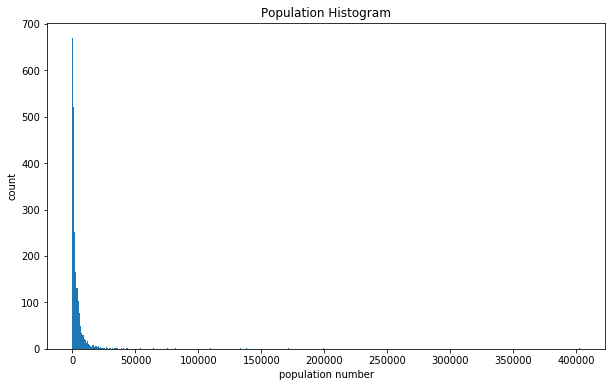

In [6]:
# Plot population histogram
plt.figure(figsize=(10,6))
plt.hist(communes_pop_selected.population, bins=500)
plt.xlabel('population number')
plt.ylabel('count')
plt.title("Population Histogram")
plt.show()

Question:
- Explain the observations
- What does this histogram tell you about urban and rural communes in Switzerland? 
- Are there any clear outliers on either side, and if so, which communes?

Answer:

- This histogram indicates that the range of pupulation of communes are extremely huge with the minimum, 14 and the maximum, 402764 (Std of pupulation is 12308, which is very large). Moreover, Count of commune with small population is extremely big while extremely small in the communes with large population.
<br/>

- We use population gap to define the urban commune or the rural commune. <br/> From the histogram, it seems that there are a large number of rural communes and extremely small number of urban communes in Switzerland in which  counts of the rural communes are serveral hundred times more than those of the urban communes. Futhermore, the population of urban areas are usually 10-100 times larger than that of rural.
<br/>

- There are two obvious outliers in urban communes and rural communes:  
 1. Counts of the urban communes with population > 40000  
 2. Counts of the rural communes with population < 100

In [7]:
print("Population of urban communes > 40000 ")
communes_pop_selected[communes_pop_selected.population > 40000]

Population of urban communes > 40000 


,commune,population
153,......0230 Winterthur,109775.0
167,......0261 Zürich,402762.0
208,......0371 Biel/Bienne,54456.0
356,......0351 Bern,133115.0
360,......0355 Köniz,40938.0
464,......0942 Thun,43568.0
519,......1061 Luzern,81592.0
929,......2701 Basel,171017.0
1072,......3203 St. Gallen,75481.0
1553,......5002 Bellinzona,42901.0


In [8]:
print("Population of urban communes < 100 ")
communes_pop_selected[communes_pop_selected.population < 100]

Population of urban communes < 100 


,commune,population
198,......0708 Schelten,37.0
199,......0709 Seehof,65.0
202,......0715 Rebévelier,43.0
243,......0389 Meienried,53.0
295,......0972 Berken,43.0
332,......0421 Rumendingen,81.0
370,......0535 Deisswil bei Münchenbuchsee,86.0
379,......0553 Wiggiswil,98.0
407,......0661 Clavaleyres,49.0
510,......0591 Saxeten,98.0


### Task 1.C
Create the figures (b) and (d) using the data extracted for task 1B. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. 

#### For figure (b)

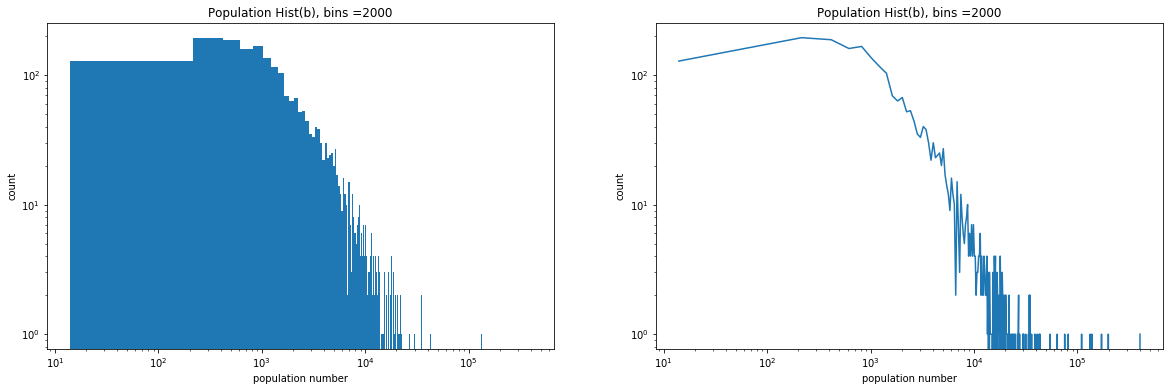

In [9]:
# For the figure B, bin_size=2000
bin_number = 2000

data_hist = communes_pop_selected.population

plt.figure(figsize =(20,6))
plt.subplot(121)
n, bins, _ = plt.hist(data_hist, bins=bin_number)
plt.xlabel('population number')
plt.ylabel('count')
plt.title('Population Hist(b), bins ={}'.format(bin_number))
plt.xscale('log')
plt.yscale('log')

plt.subplot(122)
plt.plot(bins[:-1],n)
plt.xlabel('population number')
plt.ylabel('count')
plt.title('Population Hist(b), bins ={}'.format(bin_number))
plt.xscale('log')
plt.yscale('log')

plt.show()

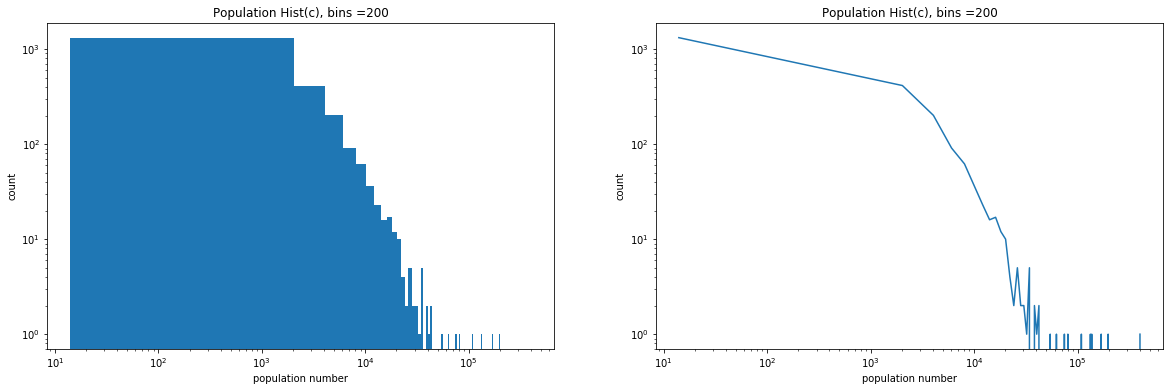

In [10]:
# For the figure B, bin_size=200
bin_number = 200

data_hist = communes_pop_selected.population

plt.figure(figsize =(20,6))
plt.subplot(121)
n, bins, _ = plt.hist(data_hist, bins=bin_number)
plt.xlabel('population number')
plt.ylabel('count')
plt.title('Population Hist(c), bins ={}'.format(bin_number))
plt.xscale('log')
plt.yscale('log')

plt.subplot(122)
plt.plot(bins[:-1],n)
plt.xlabel('population number')
plt.ylabel('count')
plt.title('Population Hist(c), bins ={}'.format(bin_number))
plt.xscale('log')
plt.yscale('log')

plt.show()

Question:
- provide a brief description of the results.
- What does this tell you about the relationship between the two variables, namely the frequency of each bin(y-axis) and the value(x-axis) (i.e. population in case of the communal data) for each bin?

Answer:

- The figure b with bigger bin size seems to have more artifacts in the graph but that with smaller bin size does not. Moreover, histogram whose bin size is 2000 can obviously observe the differences of the counts in the interval of communes with small population and the other one with 200 bin size seems to be too rough to observe these differences.
- Bins with high frequency are always in the low-value part of chart, which means the communes with small population have a huge amount.

#### For figure (d)

In [11]:
def cumulative(n, bins):
    """
    To cumulate the counts of the value bigger than the current bin's value
    
    Args:
        param1 (n): bin size
        param2 (bins): array of the last edge of each bin
        
    Returns:
        list: results of the cumulation, y values corresponding to each bin'value
    """
    cumu=[]
    for i in range(len(n)):
        sum_value = np.sum(n[i:])
        cumu.append([bins[i+1],sum_value])
    return cumu

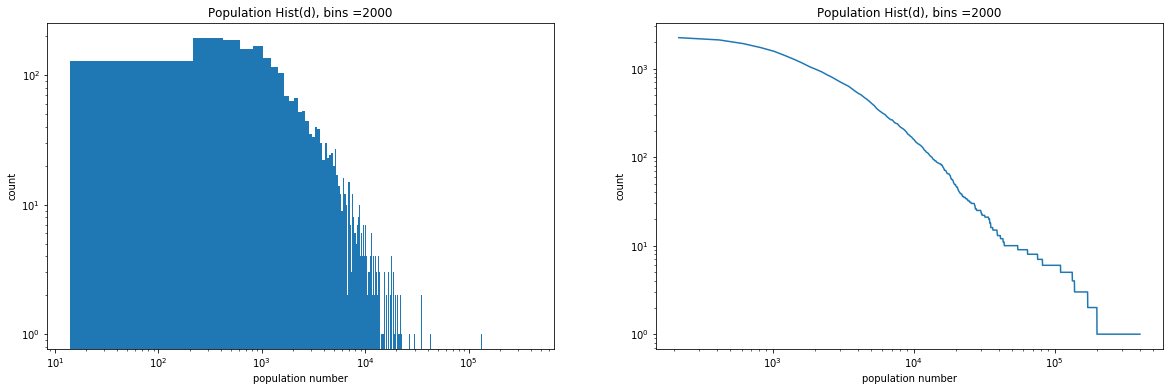

In [12]:
# For the figure D
bin_number = 2000

data_hist = communes_pop_selected.population

plt.figure(figsize =(20,6))
plt.subplot(121)
n, bins, _ = plt.hist(data_hist, bins=bin_number)
plt.xlabel('population number')
plt.ylabel('count')
plt.title('Population Hist(d), bins ={}'.format(bin_number))
plt.xscale('log')
plt.yscale('log')

plt.subplot(122)
plt.plot(np.array(cumulative(n,bins))[:,0], np.array(cumulative(n,bins))[:,1])
plt.xlabel('population number')
plt.ylabel('count')
plt.title('Population Hist(d), bins ={}'.format(bin_number))
plt.xscale('log')
plt.yscale('log')

plt.show()

In [13]:
# Frequncy of each bin and the value for each bin
bins_df = pd.DataFrame(np.array(cumulative(n,bins)))
bins_df.columns = ['Bin frequncy','Bin value']
bins_df

,Bin frequncy,Bin value
0,215.374,2239.0
1,416.748,2111.0
2,618.122,1917.0
3,819.496,1730.0
4,1020.870,1570.0
5,1222.244,1404.0
6,1423.618,1269.0
7,1624.992,1153.0
8,1826.366,1050.0
9,2027.740,981.0


## Task 2: Parties visualized

We provide a spreadsheet, `data/voters.xls`, (again) collected from [admin.ch](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/force-partis.assetdetail.217195.html), which contains the percentage of voters for each party and for each canton. For the following task, we will focus on the period 2014-2018 (the first page of the spreadsheet). Please report any assumptions you make regarding outliers, missing values, etc. Notice that data is missing for two cantons, namely Appenzell Ausserrhoden and Graubünden, and your visualisations should include data for every other canton.


__A)__ For the period 2014-2018 and for each canton, visualize, on the map, **the percentage of voters** in that canton who voted for the party [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre). Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?

__B)__ For the same period, now visualize **the number of residents** in each canton who voted for UDC.

__C)__ Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? Which one is more informative for the cantonal parliament elections?

For part B, you can use the `data/national_council_elections.xslx` file ([guess where we got it from](https://www.bfs.admin.ch/bfs/fr/home/statistiques/politique/elections/conseil-national/participation.assetdetail.81625.html)) to have the voting-eligible population of each canton in 2015.

In [14]:
# Read the excel 
voters_path = os.path.join(data_folder,'voters.xls')
voters = pd.read_excel(voters_path,index_col=None,header=2)

# Clean data and Rename the colummns
voters.dropna(axis =[0,1], how='all',inplace=True)
voters = voters.reset_index(drop=True).iloc[:26]
voters.rename(index=str, columns={"Unnamed: 0": "Communne", 'Année électorale 2)':'year'},inplace=True)

voters.head()

,Communne,year,Participation,PLR 6),PDC 7),PS,UDC,PLS 6),PEV,PCS,...,PSA,PES,AVF 8),Sol.,DS,UDF,Lega,MCR,Autres 11),Total
0,Zurich,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,NaN,4.271767,NaN,...,NaN,7.218776,2.977664,NaN,NaN,2.662277,NaN,NaN,0.669707,100
1,Berne,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,NaN,6.172897,NaN,...,0.681873,10.104467,0.495841,NaN,0.179432,3.710624,NaN,NaN,0.912781,100
2,Lucerne,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,NaN,0.199143,NaN,...,NaN,6.700011,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,100
3,Uri 1),2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,NaN,NaN,NaN,...,NaN,2.378061,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,100
4,Schwytz,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,NaN,0.304428,NaN,...,NaN,0.800215,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,100


### Task 2.A
For the period 2014-2018 and for each canton, visualize, on the map, the percentage of voters in that canton who voted for the party UDC (Union démocratique du centre).

In [15]:
# Read data
cantons_file = os.path.join(data_folder,'cantons.csv')
cantons = pd.read_csv(cantons_file,index_col=None)
cantons.head()

,Code,Canton of,Since,Capital,Population,GDP percapita (2014)[16]in CHF,Area (km2),Density (per km2)[Note 4],No. munic.,Official languages
0,ZH,Zürich,1351,Zürich,"1,504,346[17]","96,411","1,729",701,168,German
1,BE,Bern,1353,Bern,"1,031,126[18]","76,307","5,960",158,352,"German, French"
2,LU,Luzern,1332,Lucerne,"403,397[19]","65,119","1,494",233,83,German
3,UR,Uri,1291,Altdorf,"36,145[20]","51,332","1,077",33,20,German
4,SZ,Schwyz,1291,Schwyz,"155,863[21]","58,788",908,143,30,German


In [16]:
# Add 'Code' cloumn to voters
voters['Code'] = cantons['Code'].values

# The percentage of A.R.I. and Grisons are missing, to make easier to operate afterward, we fill them with 'NAN'
voters[['UDC']] = voters[['UDC']].fillna(0)

voters.head() 

,Communne,year,Participation,PLR 6),PDC 7),PS,UDC,PLS 6),PEV,PCS,...,PES,AVF 8),Sol.,DS,UDF,Lega,MCR,Autres 11),Total,Code
0,Zurich,2015.0,32.652497,17.327820,4.878712,19.716444,30.023215,NaN,4.271767,NaN,...,7.218776,2.977664,NaN,NaN,2.662277,NaN,NaN,0.669707,100,ZH
1,Berne,2018.0,30.516313,11.717910,0.671415,22.328775,26.760869,NaN,6.172897,NaN,...,10.104467,0.495841,NaN,0.179432,3.710624,NaN,NaN,0.912781,100,BE
2,Lucerne,2015.0,38.741267,21.039516,30.862513,11.848915,24.115646,NaN,0.199143,NaN,...,6.700011,NaN,NaN,NaN,NaN,NaN,NaN,0.036129,100,LU
3,Uri 1),2016.0,61.989056,26.856698,31.298814,12.984966,24.053191,NaN,NaN,NaN,...,2.378061,NaN,NaN,NaN,NaN,NaN,NaN,2.428270,100,UR
4,Schwytz,2016.0,37.747088,21.628996,27.167707,12.925363,33.115090,NaN,0.304428,NaN,...,0.800215,NaN,NaN,NaN,NaN,NaN,NaN,1.513578,100,SZ


In [17]:
# Draw the map of Lausanne
map_vote = folium.Map(
    location=coord ,
    zoom_start=8
)

# Bind the vote rate to lausnane map 
map_vote.choropleth(
    geo_data= open(ch_cantons_topo_path),
    name='choropleth',
    data = voters,
    columns=['Code', 'UDC'],
    topojson = 'objects.cantons',
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Vote Rate for UDC (%)'
)

# Control the Layer whether to show or not
folium.LayerControl().add_to(map_vote)

#map_vote    # Uncomment to show map

In [18]:
# Save map
map_vote.save('Vote_map.html')

Link to display the map in HTML: [Vote_map.html](Vote_map.html)

Question:
-  Does this party seem to be more popular in the German-speaking part, the French-speaking part, or the Italian-speaking part?
    
Answer:
- UDC party seemed to be more popular in the German-speaking part since it get highest vote rate in German-speaking part as shown in the map above.

### Task 2.B
For the same period, now visualize the number of residents in each canton who voted for UDC.

In [19]:
# Read teh elcction_ecvel data
national_council_elections_filepath = os.path.join(data_folder, 'national_council_elections.xlsx')
election_num = pd.read_excel(national_council_elections_filepath,header =2)

# Selcet relevant columns and clean the data
election_num = election_num.iloc[5:31].reset_index(drop = True)

# Rename the columns
election_num.columns = ["Cantons","Election_registered","Election_eligable","Particupation_rate"]

election_num.head()

,Cantons,Election_registered,Election_eligable,Particupation_rate
0,Zurich,907623,428837,47.2484
1,Berne,729203,357770,49.0632
2,Lucerne,271143,138096,50.9311
3,Uri 1),26414,15091,57.1326
4,Schwytz,102145,54857,53.705


In [20]:
# Add column 'resident_num_vote_udc' for voters dataframe using percentage * residents who join election eligably
# As the Percentage of A.R.I and Grisons is missing (which has been filled with 0), 
# their numbers of residents in these two cantons remain missing (presented with 0 also) here.
voters['resident_num_vote_udc'] = voters['UDC']*election_num['Election_eligable'].astype('float').values*0.01

# Draw the map of Lausanne
map_resident = folium.Map(
    location=coord ,
    zoom_start= 8
)

# Bind the resident vote for UDC to lausnane map 
map_resident.choropleth(
    geo_data= open(ch_cantons_topo_path),
    name='choropleth',
    data = voters,
    columns=['Code', 'resident_num_vote_udc'],
    topojson ='objects.cantons',
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The number of residents voted for UDC'
)

# Control the Layer whether to show or not
folium.LayerControl().add_to(map_resident)

# map_resident    # Uncomment to show map

In [21]:
# save map
map_resident.save('Resident_map.html')

Link to display the map in HTML: [Resident_map.html](Resident_map.html)

### Task 2.C
- Which one of the two visualizations above would be more informative in case of a national election with majority voting (i.e. when a party needs to have the largest number of citizens voting for it among all parties)? 
- Which one is more informative for the cantonal parliament elections?

Answer: 
- Task 2.B map_resident is more informative in case of a national election with majority voting.
- Task 2.A map_vote is more informative for the cantonal parliament elections as the cantonal parliament are generally elected by a majority system (in addition to some cantons that use seat reservation policy). It means that party with the most percentage of this canton is more likely to come to the power. (According to this [link](https://www.ch.ch/en/demokratie/federal-and-cantonal-elections-when-and-how/election-of-cantonal-parliaments-when-and-how/))

## Task 3: More socialism or more nationalism?

In this section, we focus on two parties that are representative of the left and the right on the Swiss political spectrum. You will propose a way to visualize their influence over time and for each canton.

__A)__ Take the two parties [`UDC`](https://en.wikipedia.org/wiki/Swiss_People%27s_Party) (Union démocratique du centre) and [`PS`](https://en.wikipedia.org/wiki/Social_Democratic_Party_of_Switzerland) (Parti socialiste suisse). For each canton, we define 'right lean' in a certain period as follows:

$$\frac{VoteShare_{UDC} - VoteShare_{PS}}{VoteShare_{UDC} + VoteShare_{PS}}$$  

Visualize the right lean of each canton on the map. What conclusions can you draw this time? Can you observe the [röstigraben](https://en.wikipedia.org/wiki/R%C3%B6stigraben) ?

__B)__ For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

### Task 3.A
Visualize the right lean of each canton on the map. 



In [22]:
# Fill NAN with 0 in the 'PS' columns
voters['PS'] = voters['PS'].fillna(0)

# Add columns 'right_lean' according to : (VoteShare_UDC - VoteShare_PS)/(VoteShare_UDC + VoteShare_PS)
voters['right_lean'] = (voters['UDC']-voters['PS'])/(voters['UDC']+voters['PS'])

# Fill 'NAN' values with 0 in the right_lean columns (for those with '0' Denominator)
voters['right_lean']=voters['right_lean'].fillna(0)

# Check if succeed
voters[['right_lean']].head()

,right_lean
0,0.207214
1,0.090286
2,0.341078
3,0.298833
4,0.438521


In [23]:
# Draw the map of Lausanne
map_right_lean = folium.Map(
    location=coord ,
    zoom_start=8
)

# Bind the 'right_lean' to lausnane map 
map_right_lean.choropleth(
    geo_data= open(ch_cantons_topo_path),
    name='choropleth',
    data = voters,
    columns=['Code', 'right_lean'],
    topojson = 'objects.cantons',
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Right lean value (%)'
)

folium.LayerControl().add_to(map_right_lean)

#map_right_lean    # Uncomment to show map

In [24]:
# save map
map_right_lean.save('Right_lean_map.html')

Link to display the map in HTML: [Right_lean_map.html](Right_lean_map.html)

Question:
- What conclusions can you draw this time? 
- Can you observe the röstigraben ?

Answer:
- It is clear to see that there is a difference of color between German-speaking parts in which color is darker and French-speaking parts in which color is lighter. It means that the right lean value is very different between these two parts. Right lean value in German-speaking parts is high while it is low in French-speaking parts.

- Röstigraben is a humorous term used to refer to the cultural boundary between German-speaking and French-speaking parts of Switzerland. We definitely can observe the röstigraben, i.e. the line between the darker color part(German-speaking) and the lighter color part(French-speaking), except the cantons with invalid value('NAN').


### Task 3.B
For each party, devise a way to visualize the difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton. Propose a way to visualize this evolution of the party over time, and justify your choices. There's no single correct answer, but you must reasonably explain your choices.

We had actually tried three ways to visualize this matter. `The last way` is the one we thought the most obvious to observe the change of each canton correspoding different periods.<br/> 
The following we will clarify the shortage of the first two methods to show the last methods more appropriate and obvious to see the change


###### The First way: Difference between its 2014-2018 vote share (i.e. percentage) and its 2010-2013 vote share for each canton

In this way, we just calculate the difference between the 2014-2018 and the 2010-2013, and then put it on to the map. However, we can't observe any change during the period between these two.

In [25]:
def vote_xls_clean(voters,cantons):
    """
    Clean 'NAN' data and Rename the colummns
    
    Args:
        param1 (voters): dataframe voters which has not been cleaned
        param2 (cantons): dataframe cantons which contains information about cantons
        
    Returns:
        dataframe: voters that has been cleaned
    """
    # Drop all 'NAN' rows
    voters.dropna(axis =[0,1], how='all',inplace=True)
    voters = voters.reset_index(drop=True).iloc[:26]
    voters.rename(index=str, columns={"Unnamed: 0": "Communne", 'Année électorale 2)':'year'},inplace=True)
    
    # Fill 'NAN' in the UDC Percentage columns
    voters[['UDC']] = voters[['UDC']].fillna(0)
    
    # Copy columns ['Code','Canton of'] from cantons dataframe
    voters['Code'] = cantons['Code'].values
    voters['Canton_name'] = cantons['Canton of'].values
    return voters

In [26]:
# Read voters file
vote_xls = pd.ExcelFile(voters_path)
vote_xls.sheet_names

['actuel (2014-2018)',
 '2013-2017',
 '2012-2016',
 '2011-2015',
 '2010-2014',
 '2010-2013',
 '2009-2012',
 '2008-2011',
 '2007-2010',
 'listes mixtes - méthode']

In [27]:
# Read voters sheets of 2014-2018 and 2010-2013
vote_2014_2018 = pd.read_excel(vote_xls,'actuel (2014-2018)',index_col=None, header=2)
vote_2010_2013 = pd.read_excel(vote_xls,'2010-2013',index_col=None, header=2)

# Clean data
vote_2014_2018 = vote_xls_clean(vote_2014_2018,cantons)
vote_2010_2013 = vote_xls_clean(vote_2010_2013,cantons)

# Calculate the difference between 2014-2018 and 2010-2013 of the UDC
vote_diff = vote_2014_2018[['Code']]
vote_diff['Diff'] = vote_2014_2018['UDC']-vote_2010_2013['UDC']

In [28]:
vaud_cord  = [46.616667, 6.550000]
# Draw the map of Lausanne
map_vote_diff= folium.Map(
    location=coord ,
    zoom_start=8
)


# Bind the vote_diff to lausnane map 
map_vote_diff.choropleth(
    geo_data= open(ch_cantons_topo_path),
    name='choropleth',
    data = vote_diff,
    columns=['Code', 'Diff'],
    topojson = 'objects.cantons',
    key_on='feature.id',
#     threshold_scale = threshold_scale,
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Vote Rate different for UDC between 2014-2018 and 2010-2013  (%)'
)

# Control the Layer whether to show or not
folium.LayerControl().add_to(map_vote_diff)

#map_vote_diff    # Uncomment to show map

In [29]:
# Save map
map_vote_diff.save('Vote_diff_map.html')

Link to display the map in HTML: [Vote_diff_map.html](Vote_diff_map.html)

###### The Second way: use slider widget to show the proportion of each canton in each period in map 

In this way, we implement a map with slider for people to scroll to see the change of these period, but, actually, the changes of their values are so small that we cannot observe the change in the map and some of the cantons keep the similar percentage of each period for the same party. Therefore, it is also not a good way.

In [30]:
# Add columns 'Code' and 'Coummunne' to vote_diff_time
vote_diff_time = voters[['Code']]
vote_diff_time['Communne'] = cantons['Canton of'].values

# Read all sheets of voters into dataframe vote_diff_time
vote_diff_time_UDC = vote_diff_time.copy()
vote_diff_time_PS = vote_diff_time.copy()

for ind, v in enumerate(vote_xls.sheet_names[:-1]):
    vote_tmp = pd.read_excel(vote_xls,v,index_col=None, header=2)
    vote_tmp = vote_xls_clean(vote_tmp,cantons)
    
    # Take the percentage of UDC and PS respectively from the excel sheet
    # For the first map below
    vote_diff_time[v] = vote_tmp['UDC']
    
    # For the second map below
    vote_diff_time_UDC[v] = vote_tmp['UDC']
    vote_diff_time_PS[v] = vote_tmp['PS']

In [31]:
def show_time(n_iter):
    """
    show the map with time slider
    
     Args:
        param1 (n_iter): current figure of the slider,means the order of the period:
                         2: 2014-2018
                         3: 2013-2017
                         4: 2012-2016
                         5: 2011-2015
                         6: 2010-2014
                         7: 2010-2013
                         8: 2009-2012
                         9: 2008-2011
                         10: 2007-2010
    
    Returns:
        GeoJSON data layer in obj.template_vars: return folium map which shows the difference of two period
    
    """
    vote_diff = vote_diff_time[['Code']]
    vote_diff['UDC'] = vote_diff_time.iloc[:,n_iter]

    # Draw the map of Lausanne
    map_vote_diff= folium.Map(
        location=coord ,
        zoom_start=8
    )

    # Bind the vote_diff to lausnane map 
    map_vote_diff.choropleth(
        geo_data= open(ch_cantons_topo_path),
        name='choropleth',
        data = vote_diff,
        columns=['Code', 'UDC'],
        topojson = 'objects.cantons',
        key_on='feature.id',
        fill_color='BuPu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Vote Rate for UDC between 2014-2018 and 2010-2013  (%)'
    )

    # Control the Layer whether to show or not
    folium.LayerControl().add_to(map_vote_diff)

    return map_vote_diff

In [32]:
vote_diff_time

,Code,Communne,actuel (2014-2018),2013-2017,2012-2016,2011-2015,2010-2014,2010-2013,2009-2012,2008-2011,2007-2010
0,ZH,Zürich,30.023215,30.023215,30.023215,30.023215,29.635552,29.635552,29.635552,29.635552,30.457651
1,BE,Bern,26.760869,28.981040,28.981040,28.981040,28.981040,26.621577,26.621577,26.621577,26.621577
2,LU,Luzern,24.115646,24.115646,24.115646,24.115646,22.126508,22.126508,22.126508,22.126508,18.161972
3,UR,Uri,24.053191,24.053191,24.053191,24.629866,24.629866,24.629866,24.629866,30.381581,30.381581
4,SZ,Schwyz,33.115090,33.115090,33.115090,34.004523,34.004523,34.004523,34.004523,37.484581,37.484581
5,OW,Obwalden,24.532303,24.466206,24.466206,24.466206,24.466206,21.122156,21.122156,21.122156,21.122156
6,NW,Nidwalden,25.916631,29.142199,29.142199,29.142199,29.142199,26.614033,26.614033,26.614033,26.614033
7,GL,Glarus,25.275361,28.821896,28.821896,28.821896,28.821896,26.328971,26.328971,26.328971,26.328971
8,ZG,Zug,23.631802,23.631802,23.631802,23.631802,23.631802,22.725281,22.725281,22.725281,22.725281
9,FR,Fribourg,19.717606,19.717606,19.717606,18.593468,18.593468,18.593468,18.593468,18.593468,15.958034


In [33]:
# Visualization
from ipywidgets import IntSlider, interact
interact(show_time, n_iter=IntSlider(min=2, max=vote_diff_time.shape[1]-1));

interactive(children=(IntSlider(value=2, description='n_iter', max=10, min=2), Output()), _dom_classes=('widget-interact',))

###### The Third way: a map with markers for interaction binding to a line chart corresponding to each canton

The last way we do is to implement a map with markers corresponding to each canton, which can be clicked and then we can observe a line chart showing the changes during these periods. It has a simple interactive interface and is also more clear to see the changes by the line chart for each party. (We can also observe the difference of the support percentage of different parties in that canton)

In [34]:
vote_diff_time.head()

,Code,Communne,actuel (2014-2018),2013-2017,2012-2016,2011-2015,2010-2014,2010-2013,2009-2012,2008-2011,2007-2010
0,ZH,Zürich,30.023215,30.023215,30.023215,30.023215,29.635552,29.635552,29.635552,29.635552,30.457651
1,BE,Bern,26.760869,28.981040,28.981040,28.981040,28.981040,26.621577,26.621577,26.621577,26.621577
2,LU,Luzern,24.115646,24.115646,24.115646,24.115646,22.126508,22.126508,22.126508,22.126508,18.161972
3,UR,Uri,24.053191,24.053191,24.053191,24.629866,24.629866,24.629866,24.629866,30.381581,30.381581
4,SZ,Schwyz,33.115090,33.115090,33.115090,34.004523,34.004523,34.004523,34.004523,37.484581,37.484581


In [35]:
# Prepare the data for drawing a line chart using vincent package
import vincent
draw_data_UDC = vote_diff_time_UDC.drop(['Code','Communne'], axis=1)
draw_data_PS = vote_diff_time_PS.drop(['Code','Communne'], axis=1)
# Just leave the percentage of each year of every cantons(corresponding index)
draw_data_UDC.head()

,actuel (2014-2018),2013-2017,2012-2016,2011-2015,2010-2014,2010-2013,2009-2012,2008-2011,2007-2010
0,30.023215,30.023215,30.023215,30.023215,29.635552,29.635552,29.635552,29.635552,30.457651
1,26.760869,28.981040,28.981040,28.981040,28.981040,26.621577,26.621577,26.621577,26.621577
2,24.115646,24.115646,24.115646,24.115646,22.126508,22.126508,22.126508,22.126508,18.161972
3,24.053191,24.053191,24.053191,24.629866,24.629866,24.629866,24.629866,30.381581,30.381581
4,33.115090,33.115090,33.115090,34.004523,34.004523,34.004523,34.004523,37.484581,37.484581


In [36]:
draw_data_PS.head()

,actuel (2014-2018),2013-2017,2012-2016,2011-2015,2010-2014,2010-2013,2009-2012,2008-2011,2007-2010
0,19.716444,19.716444,19.716444,19.716444,19.317182,19.317182,19.317182,19.317182,19.466631
1,22.328775,19.134111,19.134111,19.134111,19.134111,18.852832,18.852832,18.852832,18.852832
2,11.848915,11.848915,11.848915,11.848915,10.964228,10.964228,10.964228,10.964228,10.709709
3,12.984966,12.984966,12.984966,12.085318,12.085318,12.085318,12.085318,12.935764,12.935764
4,12.925363,12.925363,12.925363,12.381160,12.381160,12.381160,12.381160,11.025537,11.025537


In [37]:
# A list to store the data for line drawing
line_data = [] 
index_loc = range(draw_data_UDC.shape[1])
for row in range(draw_data_UDC.shape[0]):
    
    # put data of each year into list
    city_data_UDC = draw_data_UDC.iloc[row].values.tolist()
    city_data_PS = draw_data_PS.iloc[row].values.tolist()
    
    # Create the vincent line chart
    line = vincent.Line(
        dict(zip(['index', str(vote_diff_time_UDC.Communne[row]) + '_UDC', str(vote_diff_time_PS.Communne[row]) + '_PS'], 
                 [index_loc, city_data_UDC, city_data_PS])), 
        iter_idx='index')
    
    # Set parameters for the figures
    line.height = 150 
    line.width = 200
    line.axis_titles(x='Years', y='Vote share') 
    
    # Name the figures
    line.legend(title='Line Chart') 
    line_data.append(line)

In [38]:
# Get the cordinates of every Canton using geopy package
from geopy.geocoders import Nominatim

# A list to store cordinates of every Canton
data_loc = [] 
geolocator = Nominatim(user_agent="specify_your_app_name_here")
for i in vote_diff_time['Communne']:
    location = geolocator.geocode(i)
    data_loc.append([location.latitude, location.longitude])
    
# Correct the cordinates of Canton of Jura
data_loc[25] = [47.366667, 7.150000] 

In [39]:
map_loc = folium.Map(location = coord, zoom_start=8)

# Show the borders of the cantons 
folium.TopoJson(
    open(ch_cantons_topo_path),
    'objects.cantons',# "objects.myobject"
    name='topojson'
).add_to(map_loc)

for i, line in enumerate(line_data):
    
    # Convert line data to JSON.
    line_json = line.to_json() 
    
    # Convert line data to dict.
    line_dict = json.loads(line_json) 
    
    # Create a Vega popup based on line data
    # In this case, when user click the markers on the map, then they will see the line chart of the change of these periods.
    popup = folium.Popup() 
    folium.Vega(line, height=200, width=400).add_to(popup)
    folium.Marker(data_loc[i], popup=popup).add_to(map_loc)
    
# map_loc    # Uncomment to show map

In [40]:
# Save map
map_loc.save('Marker_line_map.html')

Link to display the map in HTML: [Marker_line_map.html](Marker_line_map.html)